In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [10]:
df['job_posted_month'] = df['job_posted_date'].dt.month_name()
df_Serbia = df[df['job_country'] == 'United States']
df_Serbia
pivot_serbia = df_Serbia.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size")
pivot_serbia.reset_index(inplace=True)
pivot_serbia['month_no'] = pd.to_datetime(pivot_serbia['job_posted_month'], format='%B').dt.month
pivot_serbia.sort_values(by="month_no", inplace=True)
pivot_serbia.set_index("job_posted_month", inplace=True)
pivot_serbia.drop(columns="month_no", inplace=True)
pivot_serbia

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

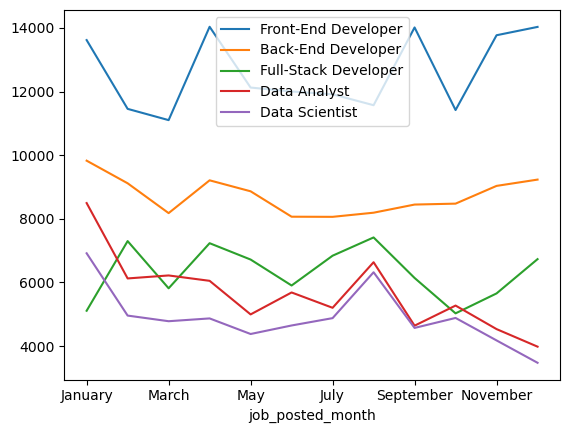

In [17]:
df_serbia_software_pivot = pd.read_csv("https://lukeb.co/software_csv").set_index("job_posted_month")
df_merged = pivot_serbia.merge(df_serbia_software_pivot, on="job_posted_month")

top_5 = df_merged.sum().sort_values(ascending=False).head().index.to_list()
df_merged.loc[:, top_5].plot(kind="line")